# EDA

This notebook provides an exploratory analysis of marriage prevalence among women aged 19-49 and fertility rates across European countries. The goal is to visualise and understand how these two key demographic indicators have changed over time.


## Libraries and data import

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
os.makedirs("../data", exist_ok=True)

# data manipulation
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import seaborn as sns

import math


sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2", 2)

df = pd.read_csv("../data/cleaned_combined_data.csv")

display(df)

,Entity,Code,Year,Estimate,Country,Continent,Fertility Rate
0,Afghanistan,AFG,1970,80.937640,Afghanistan,Asia,7.400
1,Afghanistan,AFG,1971,80.901720,Afghanistan,Asia,7.432
2,Afghanistan,AFG,1972,80.870520,Afghanistan,Asia,7.453
3,Afghanistan,AFG,1973,80.840530,Afghanistan,Asia,7.487
4,Afghanistan,AFG,1974,80.534040,Afghanistan,Asia,7.526
...,...,...,...,...,...,...,...
8964,Zimbabwe,ZWE,2018,62.325070,Zimbabwe,Africa,3.744
8965,Zimbabwe,ZWE,2019,62.239870,Zimbabwe,Africa,3.748
8966,Zimbabwe,ZWE,2020,62.207443,Zimbabwe,Africa,3.754
8967,Zimbabwe,ZWE,2021,62.215725,Zimbabwe,Africa,3.765


## Visualising fertility and marriage prevelance 
For each European country, the notebook calculates the percentage change (decline or increase) in both the share of women aged 15-49 who are married or in union ("Estimate") and the fertility rate, relative to the first year available for that country.  

These visualizations help identify:
  - Countries where marriage and fertility rates decline in parallel, suggesting a strong link.
  - Countries where trends diverge, indicating possible decoupling of marriage and fertility behaviors.
  - The timing and magnitude of demographic shifts, such as rapid declines or periods of stability.


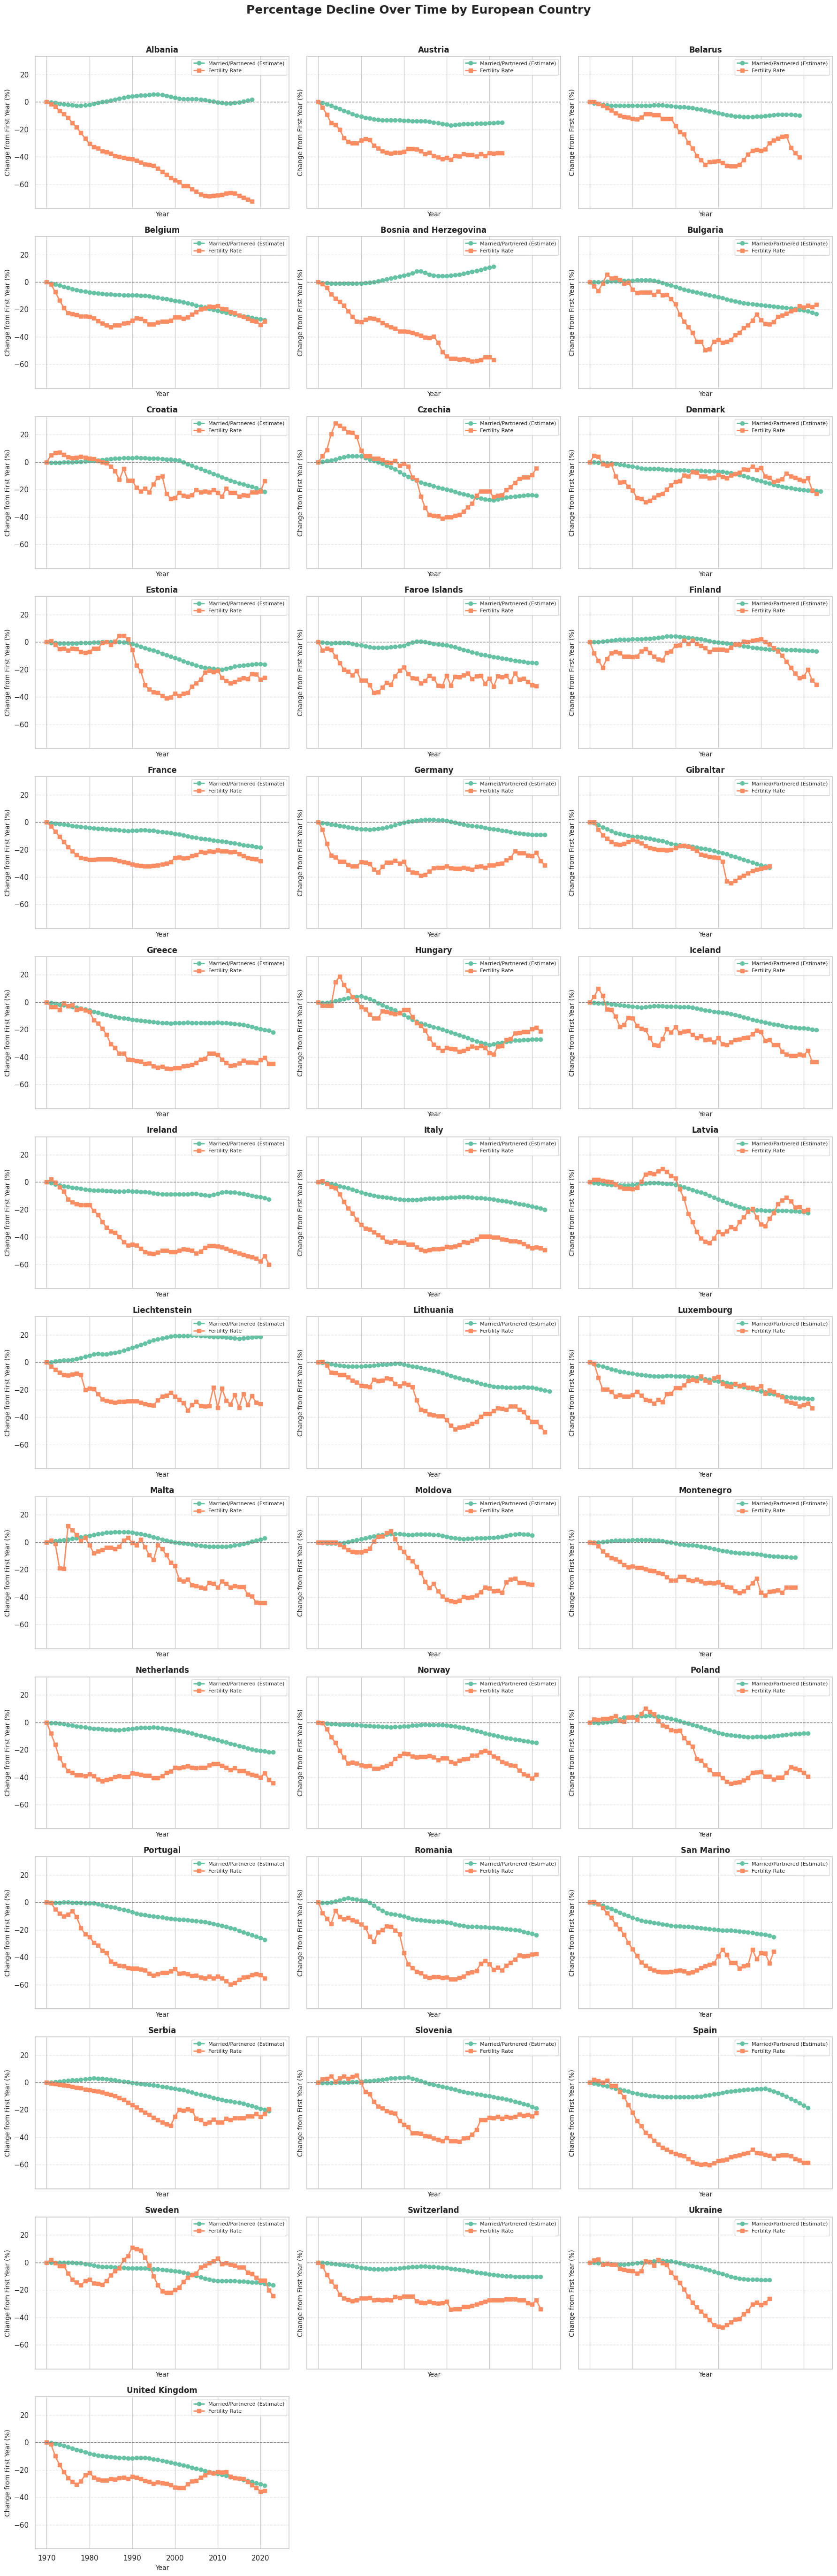

In [5]:
euro_df = df[df["Continent"] == "Europe"]
countries = euro_df["Entity"].dropna().unique()
n = len(countries)
ncols = 3 
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 4 * nrows), sharex=True, sharey=True)
axes = axes.flatten()

for i, country in enumerate(countries):
    country_df = euro_df[euro_df["Entity"] == country]
    yearly = country_df.groupby("Year")[["Estimate", "Fertility Rate"]].mean().reset_index()
    yearly = yearly.sort_values("Year")
    for col in ["Estimate", "Fertility Rate"]:
        first_val = yearly[col].iloc[0]
        yearly[f"{col} % Decline"] = 100 * (yearly[col] - first_val) / first_val

    ax = axes[i]
    color1 = palette[0]
    color2 = palette[1]

    ax.plot(yearly["Year"], yearly["Estimate % Decline"], color=color1, linewidth=2, marker='o', label="Married/Partnered (Estimate)")
    ax.plot(yearly["Year"], yearly["Fertility Rate % Decline"], color=color2, linewidth=2, marker='s', label="Fertility Rate")
    ax.axhline(0, color='grey', linestyle='--', linewidth=1)
    ax.set_title(f"{country}", fontsize=12, weight='bold')
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Change from First Year (%)', fontsize=10)
    ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.5)
    ax.legend(fontsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Percentage Decline Over Time by European Country", fontsize=18, weight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()

### Trends and possible interpretations
#### Fertility Rate Decline Is Steeper and Earlier:
- Most countries show a sharp drop in fertility rates beginning in the 1970s or 1980s.
- This decline often levels off or fluctuates slightly after 2000, but rarely reverses.
- Countries like Austria, Italy, Spain, and Greece show a sustained and substantial decline, often >40%.

#### Married/In-Union Women Decline Is More Gradual:
- The proportion of married/in-union women also declines, but more slowly and with fewer sharp inflections.
- Some countries, like Sweden, Norway, and Iceland, show only modest declines or even slight increases—likely reflecting a shift to cohabitation rather than marriage.

#### Notable Country-Specific Observations:
- Eastern Europe (e.g., Bulgaria, Romania, Ukraine):
    - Experienced sharp fertility declines post-1990, coinciding with political/economic transitions after the fall of communism.
    - Declines in marriage are more muted but still present.
- Nordic Countries (e.g., Sweden, Norway, Finland):
    - Fertility rates declined but remained relatively stable after 1990.
    - Decline in marriage/in-union status is minimal—likely due to strong social support for non-marital unions.
- Western Europe (e.g., Germany, France, UK):
    - Fertility and marriage rates both declined, but less steeply than in Eastern Europe.
    - France shows one of the most stable fertility rates—possibly due to robust family policies.
- Southern Europe (e.g., Italy, Spain, Greece):
    - Some of the largest fertility rate declines—often exceeding 50%.
    - Also notable declines in marriage/in-union status, indicating changing social norms and economic challenges for family formation.

#### Outliers and Anomalies:
- Faroe Islands and Malta show unusually high variability—likely due to small population sizes.
- Liechtenstein data is sparse and shows volatility.
- Czechia and Hungary display irregular fertility jumps in early 1990s—perhaps from post-communist policy shifts.